In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading & Preprocessing

In [22]:
# loading data
compound_data = pd.read_csv("./data/compound.txt", sep='\t',header=None)
flame_data = pd.read_csv("./data/flame.txt", sep='\t',header=None)
pathbased_data = pd.read_csv("./data/pathbased.txt", sep='\t',header=None)
spiral_data = pd.read_csv("./data/spiral.txt", sep='\t', header=None)

datasets = [
    {"data": compound_data, "name" : "Compound Data", "minpts": 4, "eps": 0.125},
    {"data": flame_data, "name" : "Flame Data", "minpts": 4, "eps": 0.28},
    {"data": pathbased_data, "name" : "Pathbased Data", "minpts": 10, "eps": 0.3},
    {"data": spiral_data, "name" : "Spiral Data", "minpts": 2, "eps": 0.15}
]

# dropping last column, standardizing all features, assigning column labels
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for d in datasets:
    d["data"].drop(columns=d["data"].columns[-1], axis=1, inplace=True)
    d["data"] = pd.DataFrame(scaler.fit_transform(d['data']))
    d['data'].columns = ['x','y']
    print(d['data'].head())

          x         y
0  0.466342  1.726481
1  0.779981  1.726481
2  0.959938  1.504849
3  0.564033  1.452079
4  0.790265  1.262108
          x         y
0 -1.712779  2.035183
1 -1.869233  1.694577
2 -1.853587  0.687568
3 -2.025686  0.628332
4 -2.135204  0.421006
          x         y
0 -0.921965 -2.076310
1 -0.958375 -2.136178
2 -1.091878 -1.948021
3 -1.097947 -1.956574
4 -1.176835 -1.776970
          x         y
0  1.858044 -1.224394
1  1.748278 -1.319198
2  1.652233 -1.414003
3  1.549327 -1.508807
4  1.439561 -1.574441


## Exploration

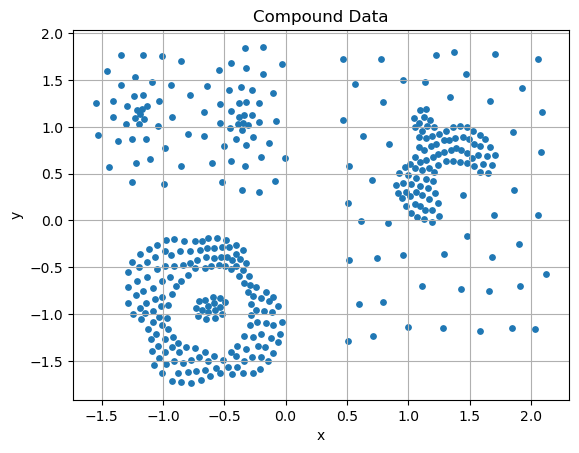

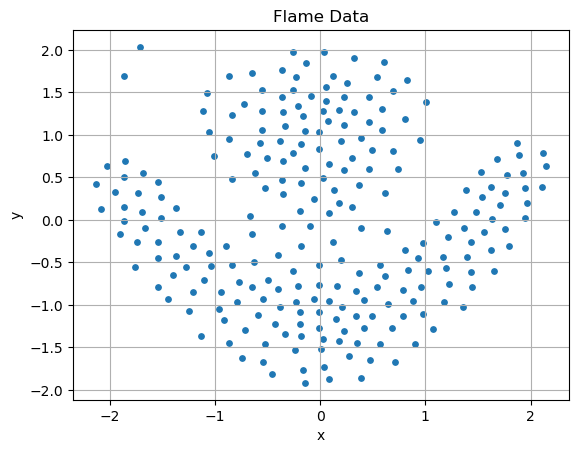

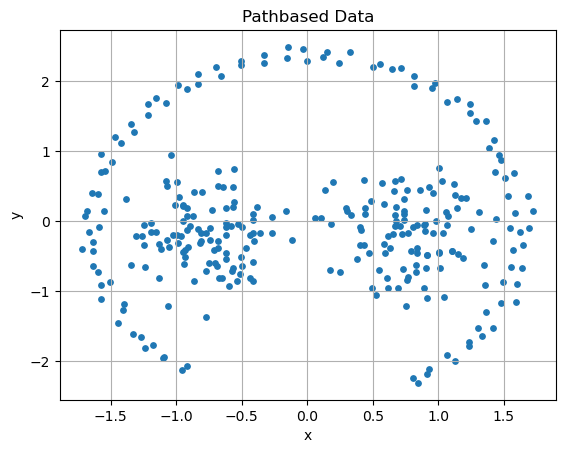

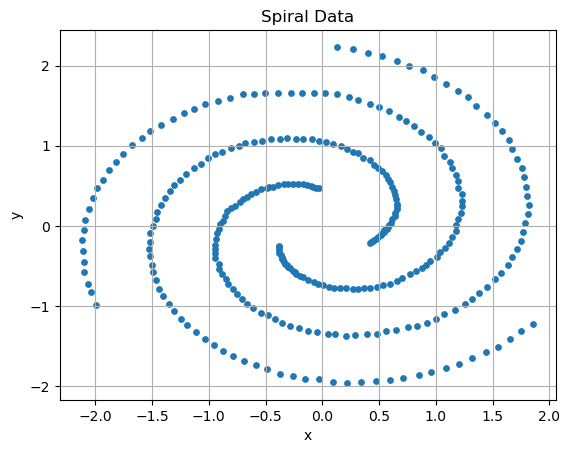

In [23]:
for d in datasets:
    plt.scatter(d['data'].x, d['data'].y, s=15)
    plt.title(d['name'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

## Part I:


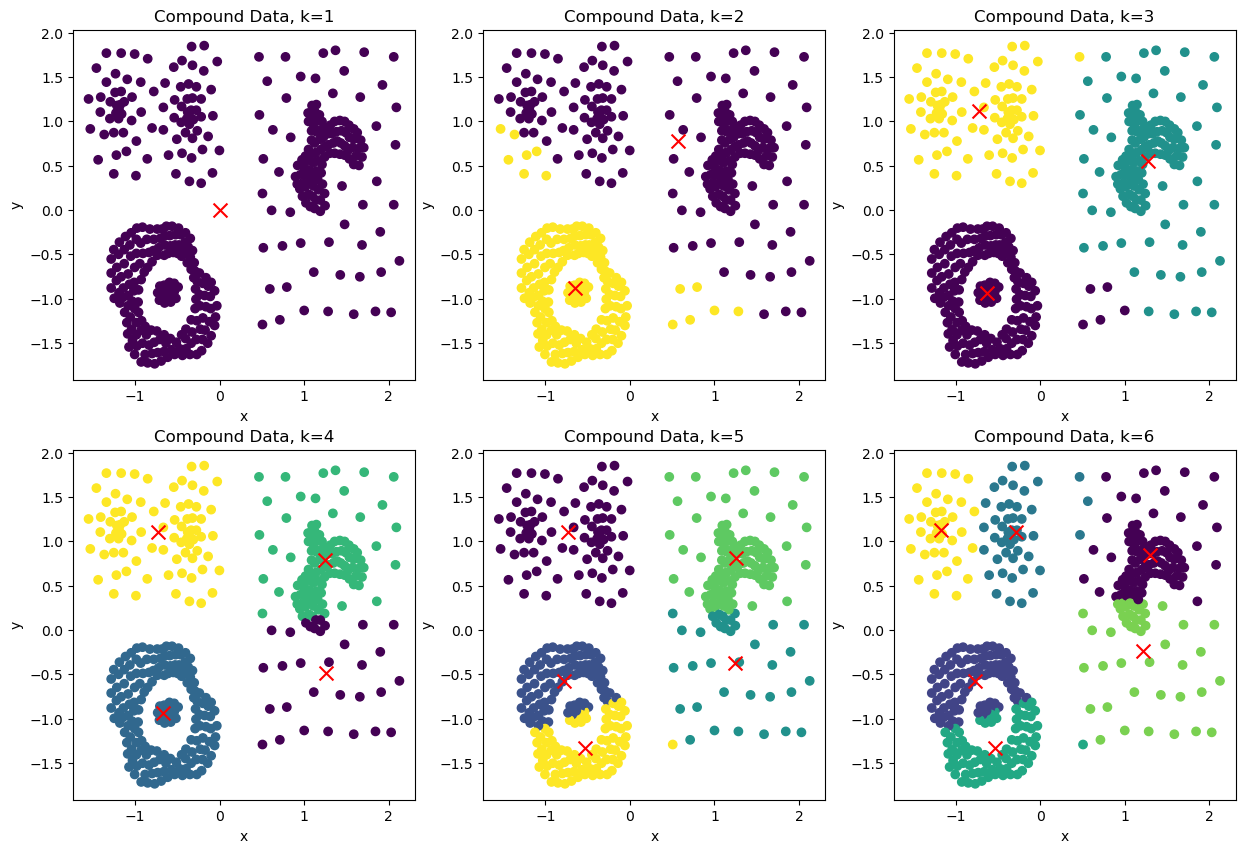

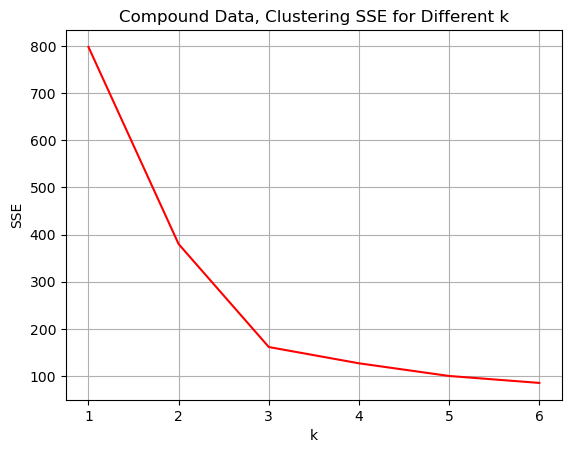

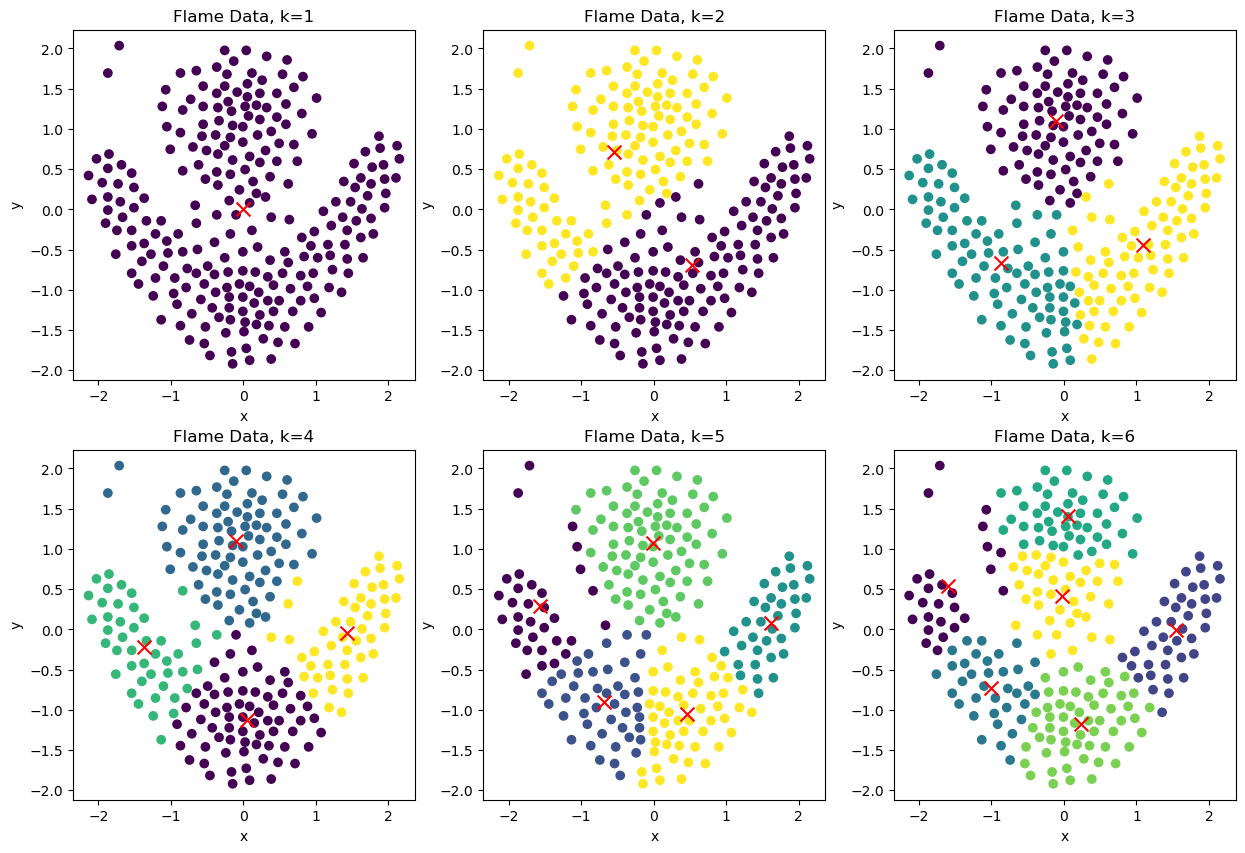

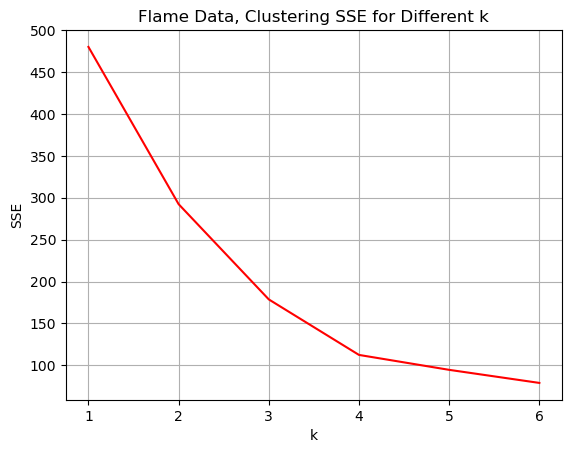

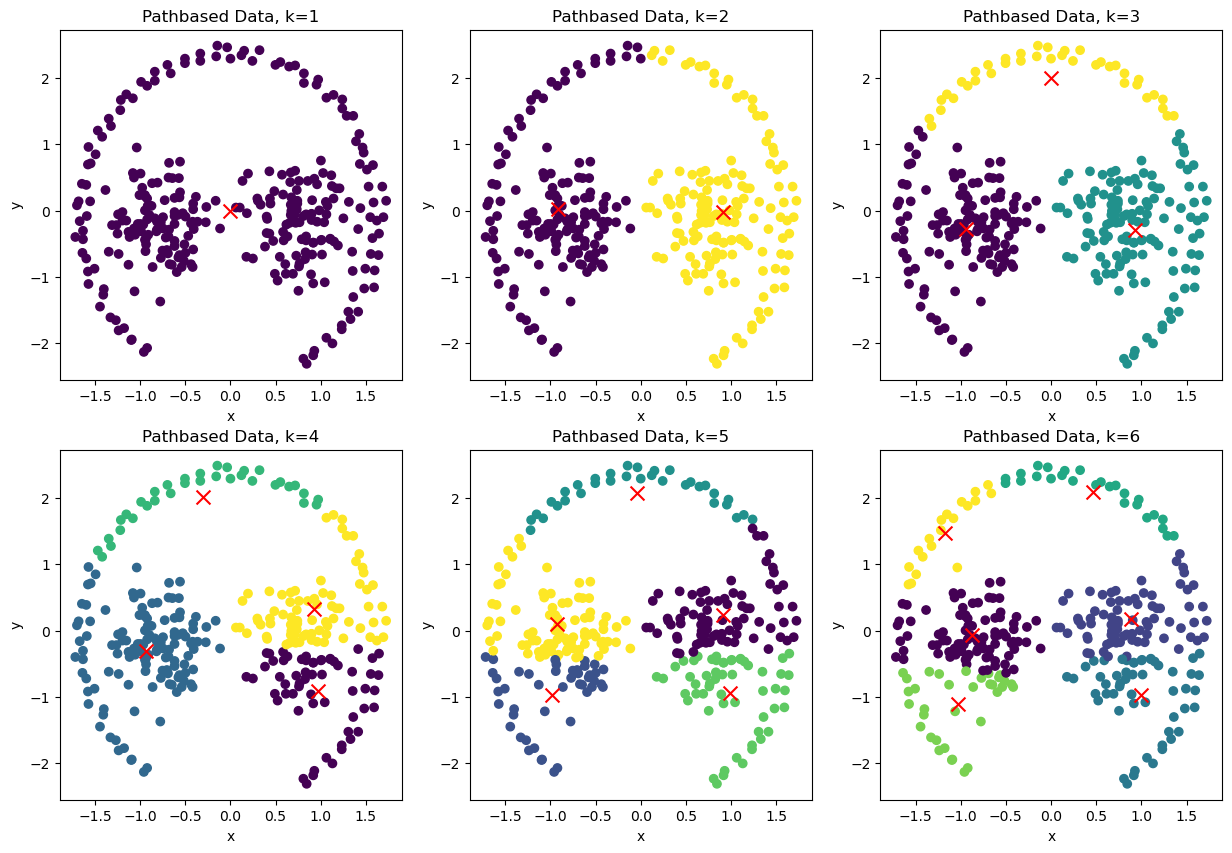

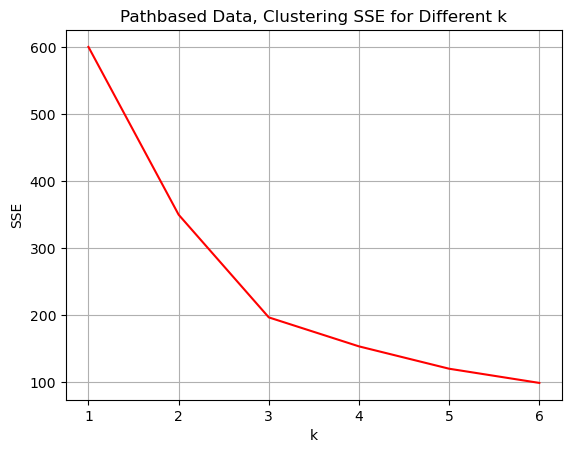

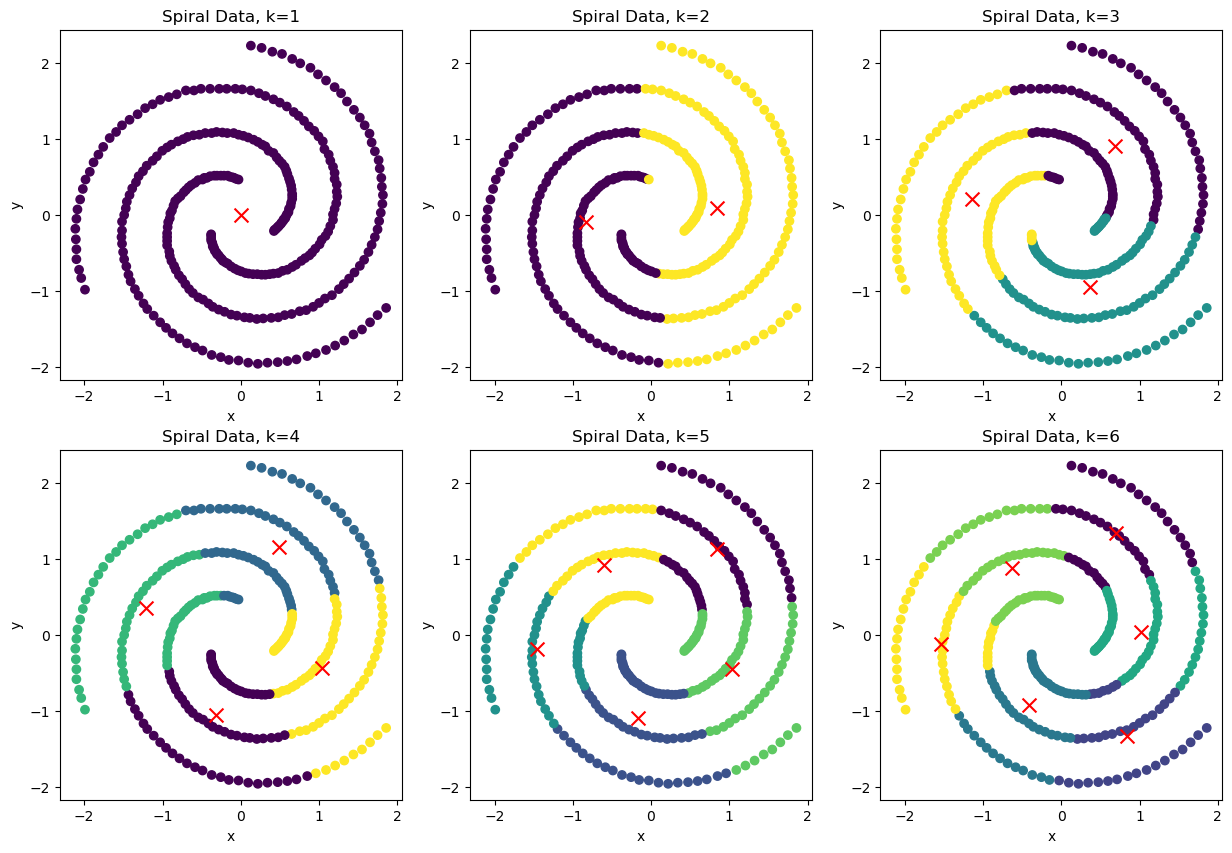

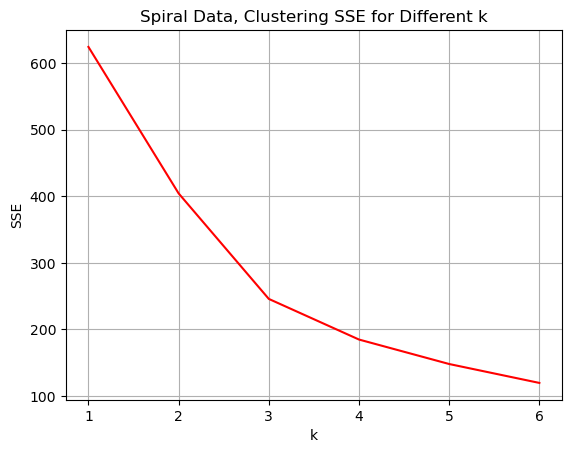

In [24]:
from sklearn import cluster

k_values = np.arange(1,7)

for d in datasets:
    
    fig, axes = plt.subplots(2,3)
    fig.set_size_inches(15,10)
    
    sse_record = []
    for k in k_values:
        ax_row = (k-1)//3
        ax_col = (k-1)%3
        centroids, labels, sse = cluster.k_means(X=d['data'],
                                                        n_clusters=k,
                                                        n_init=5,
                                                        max_iter=300)
        sse_record.append(sse)

        axes[ax_row,ax_col].scatter(d['data'].x,d['data'].y, c=labels, cmap='viridis')
        axes[ax_row,ax_col].scatter(centroids[:,0],centroids[:,1], marker='x', label='centroid', c='red', s=100)
        axes[ax_row,ax_col].set_title(f"{d['name']}, k={k}")
        axes[ax_row,ax_col].set_xlabel('x')
        axes[ax_row,ax_col].set_ylabel('y')
    plt.show()
    
    plt.plot(k_values, sse_record, c='red')
    plt.title(f"{d['name']}, Clustering SSE for Different k")
    plt.grid(True)
    plt.xlabel("k")
    plt.ylabel("SSE")
    plt.show()
    


## Part 2

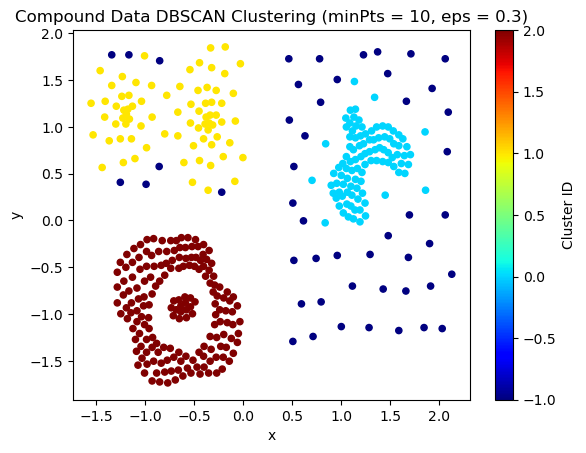

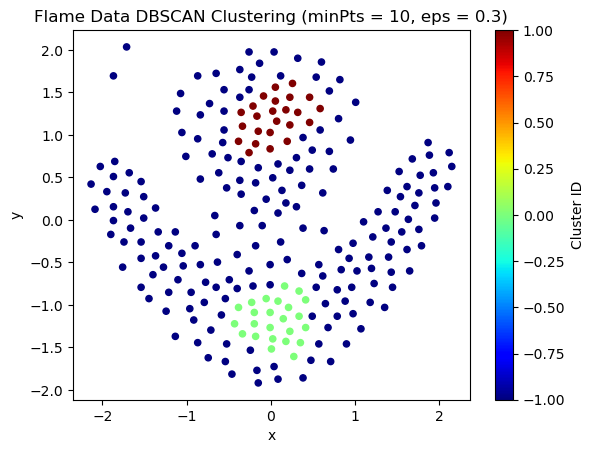

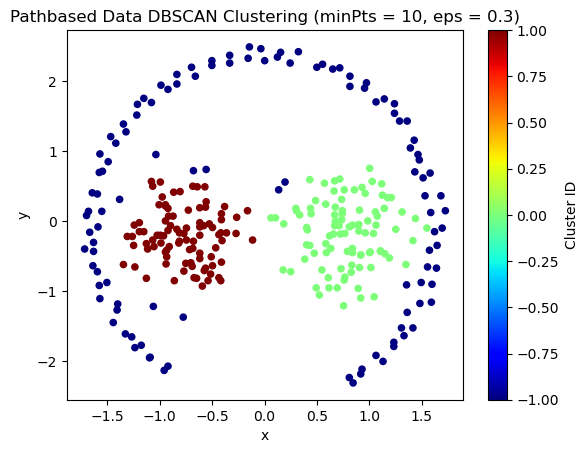

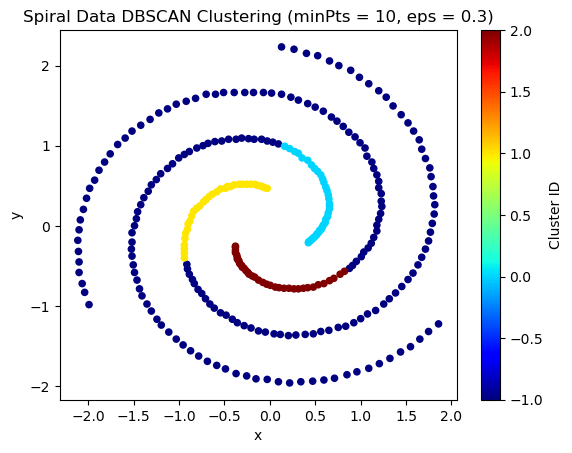

In [25]:
from sklearn.cluster import DBSCAN

def dbscan_clustering(dataset, minpts, eps):
    db = DBSCAN(eps=eps, min_samples=minpts).fit(dataset['data'])
    labels = pd.DataFrame(db.labels_, columns=['Cluster ID'], dtype=int)
    result = pd.concat((dataset['data'], labels), axis=1)
    result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
    plt.title(f'{dataset['name']} DBSCAN Clustering (minPts = {minpts}, eps = {eps})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

minpts = 10
eps = 0.3
for d in datasets:
    dbscan_clustering(dataset=d, minpts=minpts, eps=eps)

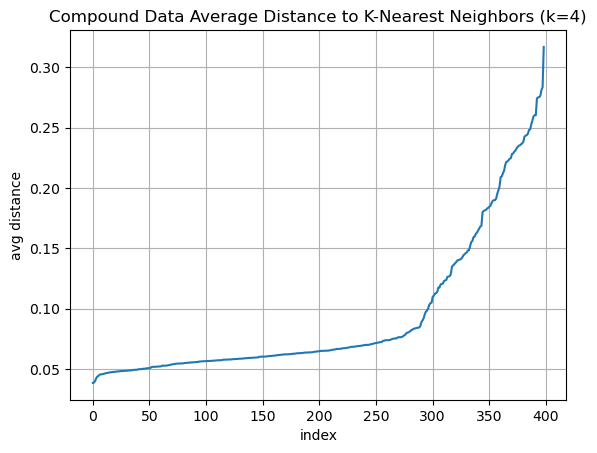

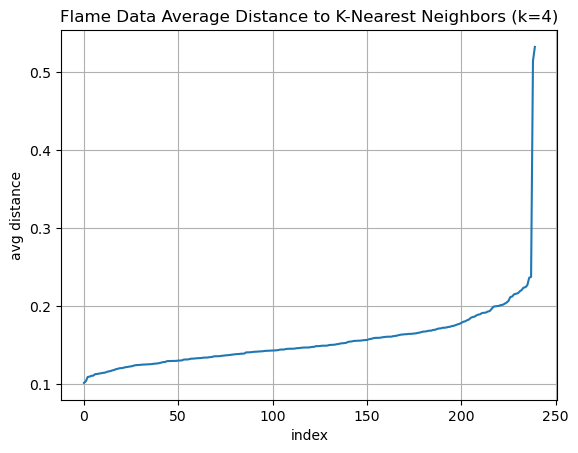

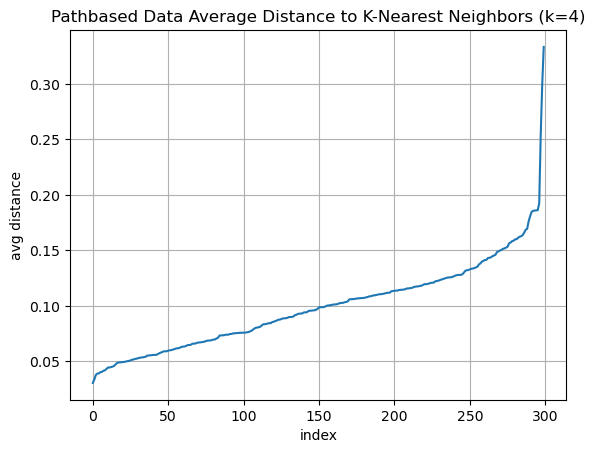

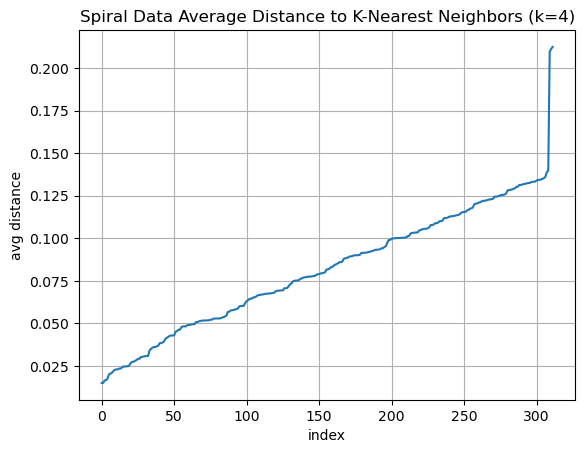

In [28]:
# since the data is 2-dimensional, we will use the default minpts (min_samples) value of 4
# using the average distance to the k=4 nearest neighbors for each data point, we can estimate eps

from sklearn.neighbors import NearestNeighbors

def d_distance_plot(data, minpts):
    nn = NearestNeighbors(n_neighbors=minpts)
    nn.fit(data['data'])
    distances, _ = nn.kneighbors(data['data'])
    average_distances = sorted(distances.mean(axis=1))
    plt.plot(average_distances)
    plt.title(f"{data['name']} Average Distance to K-Nearest Neighbors (k={minpts})")
    plt.ylabel('avg distance')
    plt.xlabel('index')
    plt.grid(True)
    plt.show()

for d in datasets:
    d_distance_plot(data=d, minpts=4)

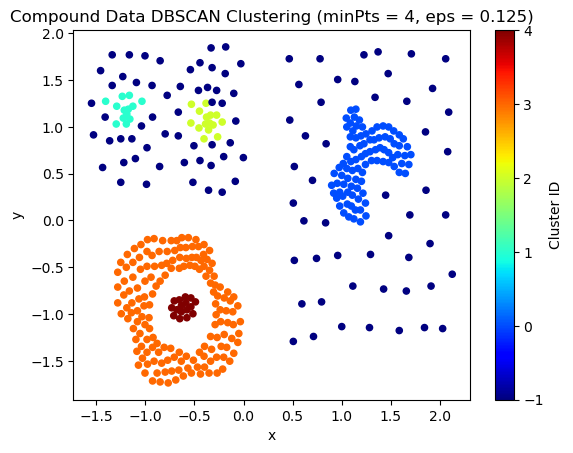

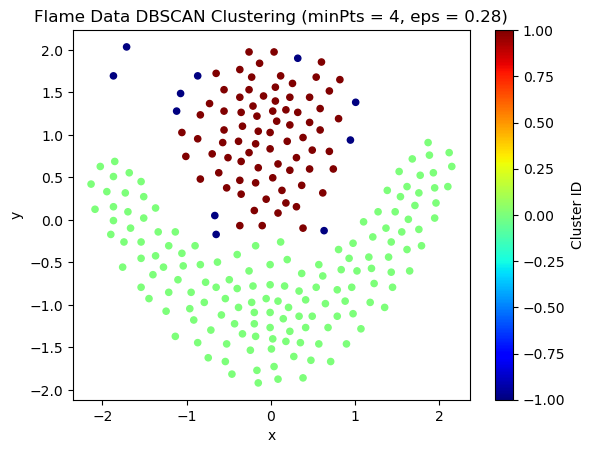

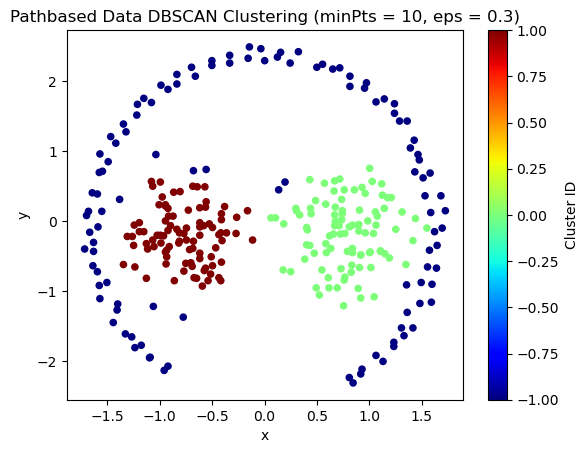

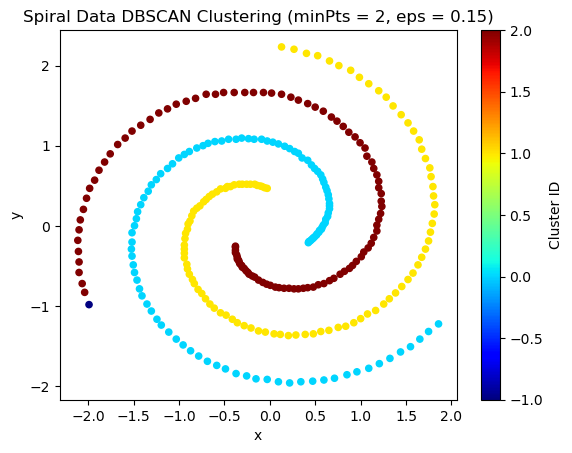

In [27]:
# Using observed elbow points, we use the appropriate eps values and re-cluster using DBSCAN

for d in datasets:    
    dbscan_clustering(dataset=d, minpts=d['minpts'], eps=d['eps'])